In [1]:
#Importing of libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA 
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import time
from statistics import variance
import statistics

In [2]:
#Loading of data

rwind = pd.read_excel("Wind.xlsx")
rwind

,Wspd (m/s)
0,1.78010
1,1.85681
2,1.89714
3,2.02640
4,2.16909
...,...
8755,4.74974
8756,4.85766
8757,4.89950
8758,4.93751


In [3]:
# This is the last year data of Wind 
rwindlastyear = rwind[1:8736]
#rwindlastyear

In [4]:
stepwisefit = auto_arima(rwind['Wspd (m/s)'], trace = True)
stepwisefit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-7797.444, Time=21.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-774.716, Time=2.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-7009.436, Time=1.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6353.894, Time=3.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-776.694, Time=1.55 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-7798.110, Time=8.30 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-7436.271, Time=4.44 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-7799.702, Time=4.50 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-7798.280, Time=8.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-7689.155, Time=1.70 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-7801.696, Time=1.53 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-6355.878, Time=1.00 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-7011.431, Time=0.39 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-7800.274, Time=1.85 sec
 ARIMA(1,1,2)(0,0,0)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 8760
Model:               SARIMAX(1, 1, 1)   Log Likelihood                3903.848
Date:                Sat, 27 Nov 2021   AIC                          -7801.696
Time:                        00:16:53   BIC                          -7780.463
Sample:                             0   HQIC                         -7794.461
                               - 8760                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5255      0.010     53.527      0.000       0.506       0.545
ma.L1          0.4184      0.009     49.180      0.000       0.402       0.435
sigma2         0.0240      0.000    116.680      0.000       0.024       0.024
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             22827.97
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.55   Skew:                             0.57
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [5]:
# Now split data into training and testing

print(rwind.shape)
train = rwind.iloc[:30]
test = rwind.iloc[30:]
print(train.shape, test.shape)


(8760, 1)
(30, 1) (8730, 1)


In [6]:
#Train the model

wind_model = ARIMA(train['Wspd (m/s)'], order = (1, 2, 3))
wind_model = wind_model.fit()
wind_model.summary()

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D2.Wspd (m/s)   No. Observations:                   28
Model:                 ARIMA(1, 2, 3)   Log Likelihood                   1.536
Method:                       css-mle   S.D. of innovations              0.199
Date:                Sat, 27 Nov 2021   AIC                              8.928
Time:                        00:16:54   BIC                             16.921
Sample:                             2   HQIC                            11.372
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0053      0.008     -0.641      0.522      -0.022       0.011
ar.L1.D2.Wspd (m/s)    -0.9668      0.043    -22.398      0.000      -1.051      -0.882
ma.L1.D2.Wspd (m/s)     0.8882      0.211      4.219      0.000       0.476       1.301
ma.L2.D2.Wspd (m/s)    -0.8883      0.206     -4.320      0.000      -1.291      -0.485
ma.L3.D2.Wspd (m/s)    -0.9999      0.217     -4.604      0.000      -1.426      -0.574
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0343           +0.0000j            1.0343            0.5000
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2           -0.9442           -0.3296j            1.0001           -0.4466
MA.3           -0.9442           +0.3296j            1.0001            0.4466
-----------------------------------------------------------------------------
"""

In [7]:
start = len(train)
end = len(train) + len(test)-1
pred = wind_model.predict(start = start, end = end, typ = 'levels')
#pred.index = rwind.index[start:end+1]
print(pred)

30           2.712732
31           2.663477
32           2.612459
33           2.552710
34           2.490969
            ...      
8755   -202328.239756
8756   -202374.577195
8757   -202420.919940
8758   -202467.267990
8759   -202513.621345
Length: 8730, dtype: float64


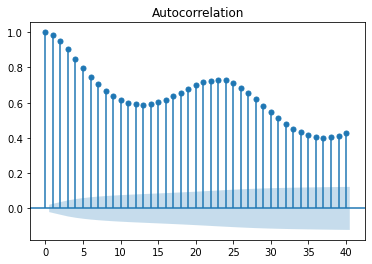

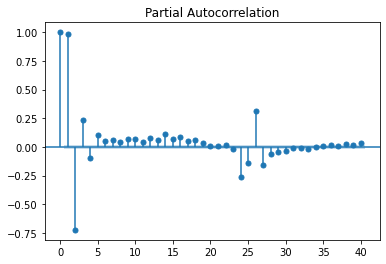

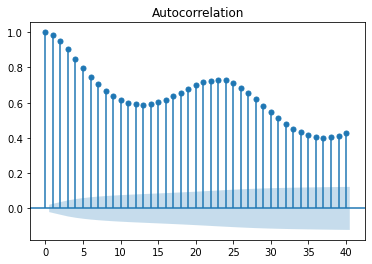

In [8]:
plot_pacf(rwind['Wspd (m/s)'])
plot_acf(rwind['Wspd (m/s)'])

In [9]:
ar_order = np.array([1, 2, 3])
ma_order = np.array([1, 2])
simulated_wind_model_data = ArmaProcess(ar_order, ma_order).generate_sample(nsample=1000)

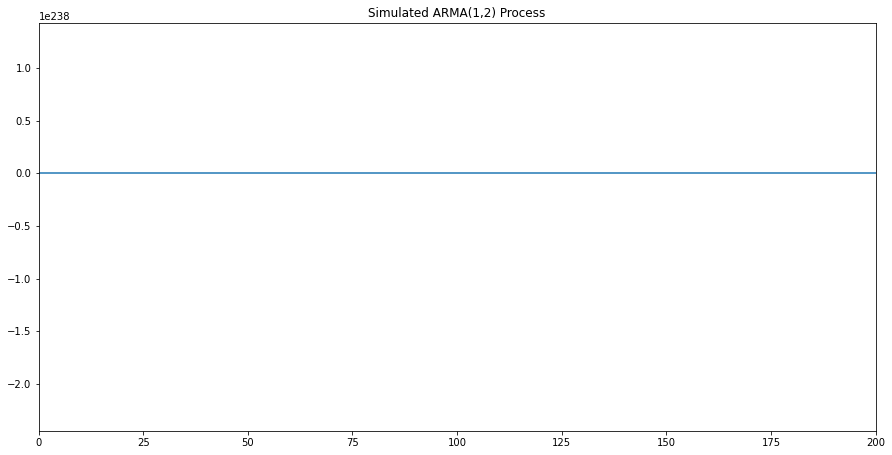

In [10]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(simulated_wind_model_data)
plt.title("Simulated ARMA(1,2) Process")
plt.xlim([0, 200])
plt.show()

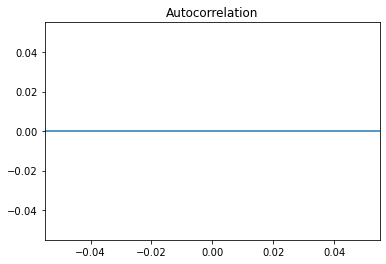

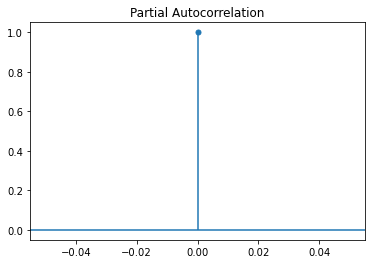

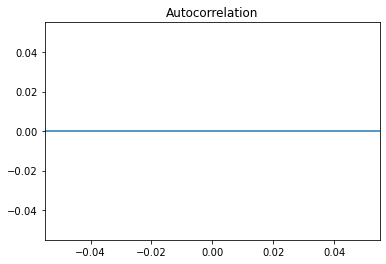

In [11]:
plot_pacf(simulated_wind_model_data)
plot_acf(simulated_wind_model_data)

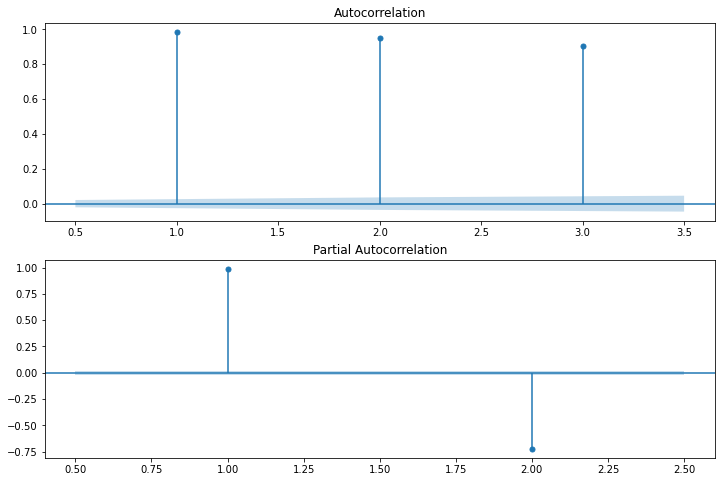

In [12]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(rwind.values.squeeze(), lags=(1, 2, 3), ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(rwind, lags=(1, 2), ax=ax2)

In [13]:
y = rwind['Wspd (m/s)']
y

0       1.78010
1       1.85681
2       1.89714
3       2.02640
4       2.16909
         ...   
8755    4.74974
8756    4.85766
8757    4.89950
8758    4.93751
8759    4.96058
Name: Wspd (m/s), Length: 8760, dtype: float64

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model ="additive")#tsa for doing time series analysis
fig = decomposition.plot()
plt.show()


ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

In [ ]:
Seasonality = seasonal_decompose(rwind, model="multiplicative")
Seasonal_values = Seasonality.seasonal

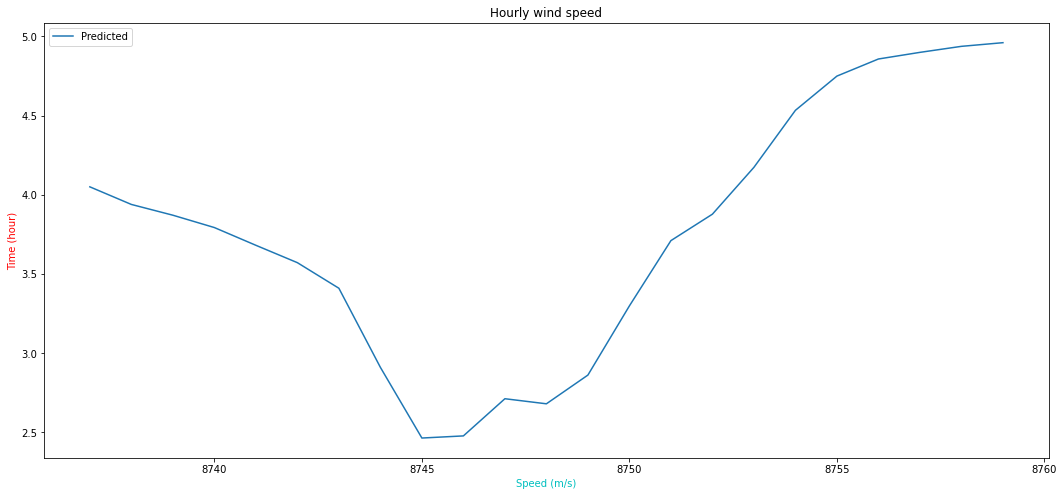

In [15]:
rwindData_plot= rwind[8737:8760]
plt.plot(rwindData_plot)
plt.title('Hourly wind speed')
plt.xlabel('Speed (m/s)', color = 'c')
plt.ylabel('Time (hour)', color = 'r')
plt.legend(["Predicted","Actual","Location","best"],loc ="upper left")
plt.show()